In [719]:
import os
cwd = os.getcwd()
print(cwd)

/Users/user/Desktop


In [720]:
os.chdir('/Users/user/desktop')

In [721]:
#This library allows to read and format Excel files
import xlrd 

In [722]:
#import working data which contains CALR vs. CALR mutant RNA seq. results and the lists of genes associated with the unfolded protein response (UPR) and Glycolysis (Gly) pathways obtained from Reactome database
import pandas as pd
xl = pd.ExcelFile("RNAseqdata.xls")


In [723]:
#Select colums of interest in the CALR vs. CALR mutant RNA Seq: we are only interested in the gene NAME and their expression score 
cols = ['NAME', 'SCORE']
df = xl.parse("RNAseq")
df.drop('DESCRIPTION', axis =1, inplace = True)
df.drop('GENE_SYMBOL', axis =1, inplace = True)
df.drop('GENE_TITLE', axis =1, inplace = True)
df

,NAME,SCORE
0,CD53,31.086206
1,PIM2,30.288067
2,NSF,29.087437
3,PSAT1,28.312407
4,MTHFD2,26.850730
...,...,...
16097,F10,-34.502815
16098,PIK3C2G,-34.909992
16099,D930015E06RIK,-38.306778
16100,PLAC8,-39.212330


In [724]:
#sort CALR vs. CALR mutant RNA Seq. genes by the given expression score from lowest to highest

df = df.sort_values(by=['SCORE'])
df

,NAME,SCORE
16101,NEAT1,-44.626900
16100,PLAC8,-39.212330
16099,D930015E06RIK,-38.306778
16098,PIK3C2G,-34.909992
16097,F10,-34.502815
...,...,...
4,MTHFD2,26.850730
3,PSAT1,28.312407
2,NSF,29.087437
1,PIM2,30.288067


In [725]:
#set threshold and define range of genes thought to be signicantly upregulated based on threshold (threshold value can be set based on the literature, in this case we use 10 as an arbitrary value)
#Anything above score 10 is considered signifincantly upregulated 
#Define upregulated genes dataframe
df_Upregulated = df[df['SCORE'] >= 10] 

In [726]:
#list of significantly upregulated genes
print (df_Upregulated [['NAME', 'SCORE']])

        NAME      SCORE
610    SYNE3  10.003552
609   CRYZL1  10.004596
608  SMARCA5  10.007616
607     NIP7  10.013830
606    NDC80  10.020450
..       ...        ...
4     MTHFD2  26.850730
3      PSAT1  28.312407
2        NSF  29.087437
1       PIM2  30.288067
0       CD53  31.086206

[611 rows x 2 columns]


In [727]:
#Graphing of the significantly upregulated genes, this gives the user the ability to visualize the general trend of the results
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import StrMethodFormatter

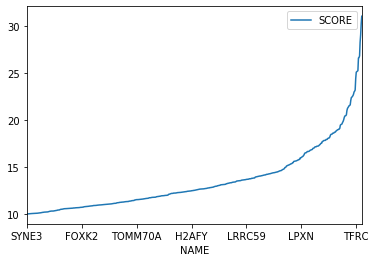

In [728]:
#Graph significantly upregulated genes 
df_Upregulated.plot(x='NAME', y='SCORE')

In [729]:
#set threshold and define range of genes thought to be signicantly dowregulated based on threshold (threshold value can be set based on the literature, in this case we use -5 as an arbitrary value)
#Anything above score -5 is considered signifincantly downregulated 
#define downregulated genes dataframe
df_downregulated = df[df['SCORE'] <= -5] 

In [730]:
#list significantly downregulated genes based on threshold 
print (df_downregulated [['NAME', 'SCORE']])

                NAME      SCORE
16101          NEAT1 -44.626900
16100          PLAC8 -39.212330
16099  D930015E06RIK -38.306778
16098        PIK3C2G -34.909992
16097            F10 -34.502815
...              ...        ...
14776         TRIM11  -5.015011
14775         PCNXL3  -5.013907
14774          ESYT2  -5.012969
14773          SYNE4  -5.005306
14772       ANKRD13D  -5.001893

[1330 rows x 2 columns]


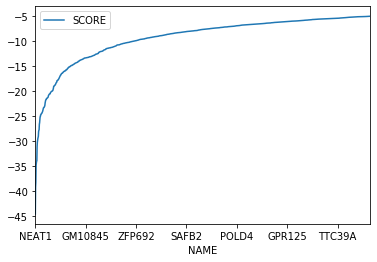

In [731]:
#Graph of significantly downregulated genes
df_low.plot(x='NAME', y='SCORE')

In [732]:
#Select UPR associated genes to be matched against significantly down or upregulated RNA seq. genes
#Discriminate columns: only information required from the UPR associated genes data is the gene "symbol"
cols = ['Symbol']
df = xl.parse("UPR")
df

,Symbol
0,ACADVL
1,ADD1
2,ARFGAP1
3,ASNS
4,ATF3
...,...
74,WFS1
75,WIPI1
76,XBP1
77,YIF1A


In [733]:
#Define UPR associated genes as dataframe
df_upr = xl.parse("UPR")

In [734]:
#check/list UPR data frame
print (df_upr)

     Symbol
0    ACADVL
1      ADD1
2   ARFGAP1
3      ASNS
4      ATF3
..      ...
74     WFS1
75    WIPI1
76     XBP1
77    YIF1A
78   ZBTB17

[79 rows x 1 columns]


In [735]:
#Write UPR and RNA seq. upregulated genes in one excel file named UPRUpMatch.xlsx
from pandas import ExcelWriter
writer = pd.ExcelWriter('UPRUpMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_Upregulated.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

In [736]:
#Drop non-required colums/data from data imported in the UPRUpMatch.xlsx
#Match UPR and Upregulated genes based gene name
#Whichever genes are found in both or match UPR and RNA seq. upregulated columns will appear in list below with the corresponding expression score
import pandas as pd
df = pd.read_excel('UPRUpMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
12,CXCL8,EXOSC2,10.054875
58,PDIA6,DNAJB11,10.422532
81,NaN,EIF2S1,10.598577
188,NaN,EXOSC8,11.372314
214,NaN,ATF6,11.616917
232,NaN,PDIA6,11.781059
257,NaN,HYOU1,12.013284
514,NaN,ATF4,16.686472
601,NaN,ASNS,25.177706


In [737]:
#Import the chart above as output into a seperate excel sheet named UPRUpGraph.xlsx

from pandas import ExcelWriter

writer = ExcelWriter('UPRUpGraph.xlsx')
result.to_excel(writer,'one',index=False)
writer.save()

In [738]:
#Generate graph of the matched UPR and Upregulated RNA Seq. genes 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

Text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes')

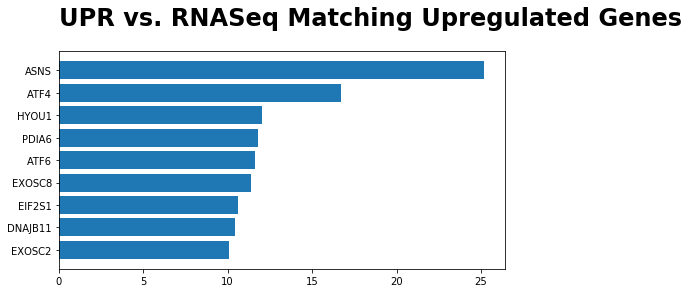

In [739]:
#Graph matched genes (include gene name and expression score) 

df = pd.read_excel('UpGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')


In [740]:
#Write UPR and RNA seq. dowregulated genes in one excel file named UPRDownMatch.xlsx
writer = pd.ExcelWriter('UPRDownMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_low.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

In [741]:
#Match UPR and dowregulated genes based gene name
#Whichever genes are found in both or match UPR and RNA seq. downregulated columns will appear in list below with the corresponding expression score
df = pd.read_excel('UPRDownMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
61,PREB,ERN1,-20.256012
455,NaN,TPP1,-9.285360
898,NaN,PLA2G4B,-6.491310
1230,NaN,ADD1,-5.280332


In [742]:
#Import the chart above as output into a seperate excel sheet named UPRDownGraph.xlsx
writer = ExcelWriter('UPRDownGraph.xlsx')
result.to_excel(writer,'one',index=False)
writer.save()

Text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes')

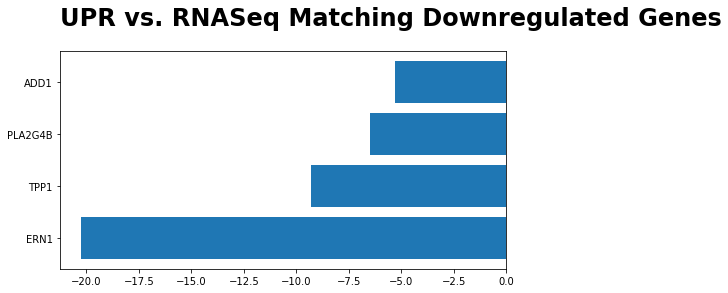

In [743]:
#Generate graph of the matched UPR and downregulated RNA Seq. genes 
#Graph matched genes (include gene name and score)

df = pd.read_excel('UPRDownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [744]:
#Select Glycolysis (Gly) associated genes to be matched against significantly down or upregulated RNA seq. genes
#Discriminate columns: only information required from the Gly associated genes data is the gene "symbol"
cols = ['Symbol']
df = xl.parse("Gly")
df

,Symbol
0,ABCB1
1,ACLY
2,ACMSD
3,ACP1
4,ADA
...,...
80,TSC1
81,UCA1
82,UCP3
83,VEGFA


In [745]:
#Define Gly associated genes as dataframe
df_Gly = xl.parse("Gly")

In [746]:
#check/list Gly data frame
print (df_Gly)

   Symbol
0   ABCB1
1    ACLY
2   ACMSD
3    ACP1
4     ADA
..    ...
80   TSC1
81   UCA1
82   UCP3
83  VEGFA
84    VHL

[85 rows x 1 columns]


In [747]:
#Write Gly and RNA seq. upregulated genes in one excel file named GlyUpMatch.xlsx

writer = pd.ExcelWriter('GlyUpMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_high.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [748]:
#Drop non-required colums/data from data imported in the GlyUpMatch.xlsx
#Match Gly and Upregulated genes based gene name
#Whichever genes are found in both or match Gly and RNA seq. upregulated columns will appear in list below with the corresponding expression score

df = pd.read_excel('GlyUpMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
88,NaN,ACP1,10.655144
354,NaN,C1QBP,13.114568
403,NaN,PCNA,13.705776
406,NaN,PFKP,13.754307
426,NaN,MTDH,14.049484
497,NaN,ENO1,15.826998
507,NaN,TGFB1,16.503178
510,NaN,GAPDH,16.606325
521,NaN,SLC2A3,16.992449
522,NaN,BIRC5,17.017273


In [749]:
#Import the above chart of matching genes as output into a seperate excel sheet named GlyUpGraph.xlsx
writer = ExcelWriter('GlyUpGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes')

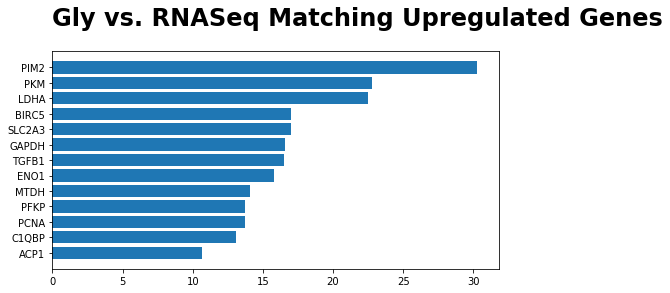

In [750]:
#Graph matched genes (include gene name and score) 
df = pd.read_excel('GlyUpGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [751]:
#Write Gly and RNA seq. downregulated genes in one excel file named GlyDownMatch.xlsx
writer = pd.ExcelWriter('GlyDownMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_low.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [752]:
#Match Gly and dowregulated genes based on gene name
#Whichever genes are found in both or match UPR and RNA seq. downregulated columns will appear in list below with the corresponding expression scor
df = pd.read_excel('GlyDownMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
252,NaN,MLXIP,-12.262503
357,NaN,PTEN,-10.370646
989,NaN,PFKFB2,-6.107767
1081,NaN,CASP1,-5.765456
1231,NaN,FOXO3,-5.278526


In [753]:
#Import the chart above as output into a seperate excel sheet named GlyDownGraph.xlsx
writer = ExcelWriter('GlyDownGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes')

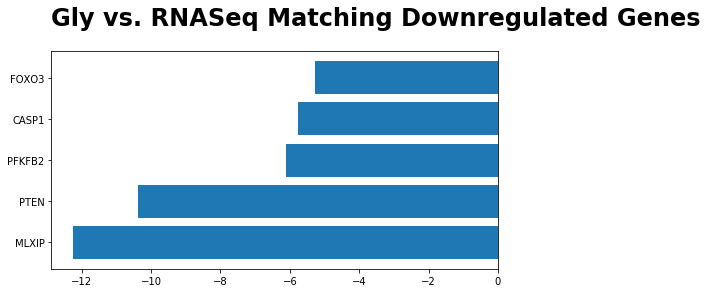

In [754]:
#Generate graph of the matched Gly and downregulated RNA Seq. genes 
#Graph matched genes (include gene name and score)

df = pd.read_excel('GlyDownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')